# Unsupervised Learning - Checking the swiss food dataset

This notebook is used to check the preprocessed swiss food dataset and some of its categories, how would they cluster. I used only the first 120 rows (1-120) and changed the categories according to the dictionary below.

In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from umap import  UMAP

c:\Users\dorie\anaconda3\envs\ml4food\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\dorie\anaconda3\envs\ml4food\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\dorie\anaconda3\envs\ml4food\lib\site-packages\umap\distances.py:1086: NumbaD

## Load the data

In [4]:
dataset = pd.read_csv('../data/swiss_food_composition_proc.csv', index_col=0)

In [5]:
#dataset = dataset.iloc[1:121, :] # working only with the first 120 food samples
dataset

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,split
ID,,,,,,,,,,,,,,,,,,,,,
2,Almond,fruits,2.470273,2.546513,0.008358,4.503052,1.488234,-0.543661,-0.392568,-0.016448,...,1.555082,-0.160855,-0.146465,1.244480,3.641656,2.293353,0.606897,-0.090492,1.240570,train
3,"Almond, dry roasted, salted",nuts,2.547143,2.571048,0.008358,4.778862,1.741154,-0.543661,-0.286820,-0.133392,...,1.456779,-0.083837,0.109730,1.244480,4.347472,2.040729,0.741814,-0.080053,1.240570,test
4,"Almond, roasted, salted",nuts,2.618100,2.736659,0.022312,5.054672,1.820191,-0.543661,-0.420154,-0.154029,...,1.325709,-0.050189,0.109730,1.052747,4.171018,2.040729,0.606897,-0.080053,1.114033,test
5,"Amaranth, seed, cooked (without addition of fa...",cereals,-0.515837,-0.520365,-0.507942,-0.510205,-0.187356,-0.543661,0.080999,-0.436070,...,-0.378208,-0.160586,-0.147356,-0.110431,0.888977,0.209208,0.505708,-0.087645,-0.088073,train
6,"Amaranth, seed, raw",cereals,1.003827,-0.219811,-0.354448,-0.315515,0.128793,-0.543661,1.860321,-0.353522,...,0.703124,-0.159880,-0.130871,0.541460,3.818110,2.609132,2.529475,-0.079579,1.493645,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,"Zucchini piccata, prepared",other,-0.486271,-0.158473,-0.256769,0.057640,-0.155741,0.364296,-0.447741,-0.346643,...,-0.181603,-0.129933,-0.121960,0.004608,-0.169746,-0.314986,-0.202610,-0.039249,-0.404417,test
1088,"Zucchini slices, breaded, prepared",other,-0.468532,-0.311817,-0.466080,-0.039705,-0.171548,0.070956,-0.130497,-0.326005,...,-0.181603,-0.131279,-0.119732,-0.302164,-0.169746,-0.517085,-0.168881,-0.056805,-0.530954,train
1089,"Zucchini, raw",vegetables,-1.107146,-0.636906,-0.563759,-0.591325,-0.298008,-0.543661,-0.659236,-0.339764,...,-0.116067,-0.160216,-0.150030,-0.359684,-0.187392,-0.731815,-0.236340,-0.080528,-0.720760,train


## Dimensionality Reduction and Visualization

In [25]:
def visualize_data(data:pd.DataFrame, title:str, hue_value:str):
    sns.set(
    rc={'figure.figsize':(7, 5), 
        'font.family': ['DejaVu Sans']}, 
    style='white'
)
    with sns.plotting_context("notebook", font_scale=1.3):
        ax = sns.scatterplot(
        data=data,
        x=data.columns[0], y=data.columns[1],
        alpha=1, hue= hue_value,
        palette='tab10'
    )
        ax.set(title=title)
        sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5))


Now we apply PCA and visualize the results. 

In [20]:
pca = PCA(n_components=2)
pca_components = pd.DataFrame(
    pca.fit_transform(dataset.iloc[:, 2:-1]), 
    columns=['dim_1', 'dim_2'],
    index=dataset.index
)
#pca_components
data_after_pca = pd.concat([pca_components, dataset.iloc[:, 1]], axis=1, ignore_index=True)
data_after_pca.columns = ['dim_1', 'dim_2', 'category']

In [21]:
data_after_pca

,dim1,dim2,category
ID,,,
2,6.549825,6.456949,fruits
3,6.923943,6.193908,nuts
4,6.486741,6.898402,nuts
5,-0.924372,-0.584690,cereals
6,3.946850,0.080230,cereals
...,...,...,...
1087,-1.155762,-0.417045,other
1088,-1.385470,-0.417725,other
1089,-2.294305,-1.180001,vegetables


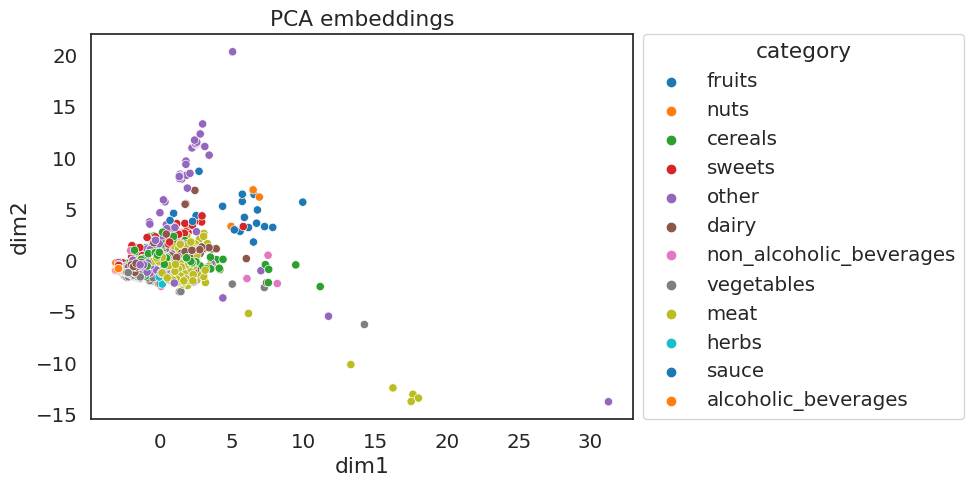

In [26]:
visualize_data(data_after_pca, 'PCA embeddings', hue_value='category')

Trying UMAP

In [29]:
umap = UMAP(n_components=2, n_neighbors=20, random_state=0)
umap_components = pd.DataFrame(
    data=umap.fit_transform(dataset.iloc[:, 2:-1]), 
    columns=['dim_1', 'dim_2'],
    index = dataset.index
)

data_after_umap = pd.concat([umap_components, dataset.iloc[:, 1]], axis=1)
data_after_umap.columns = ['dim_1', 'dim_2', 'category']

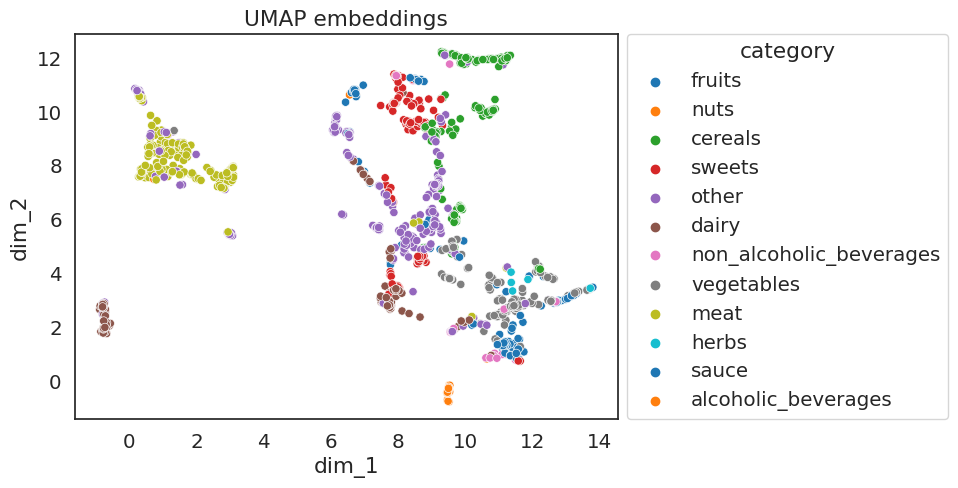

In [30]:
visualize_data(data_after_umap, 'UMAP embeddings', hue_value='category')

Try tSNE

In [31]:
tsne = TSNE(n_components=2, perplexity=20)
tsne_components = pd.DataFrame(
    data=tsne.fit_transform(dataset.iloc[:, 2:-1]), 
    columns=['dim_1', 'dim_2']
)
data_after_tsne = pd.concat([tsne_components, dataset.iloc[:, 1]], axis=1)
data_after_tsne.columns = ['dim_1', 'dim_2', 'category']

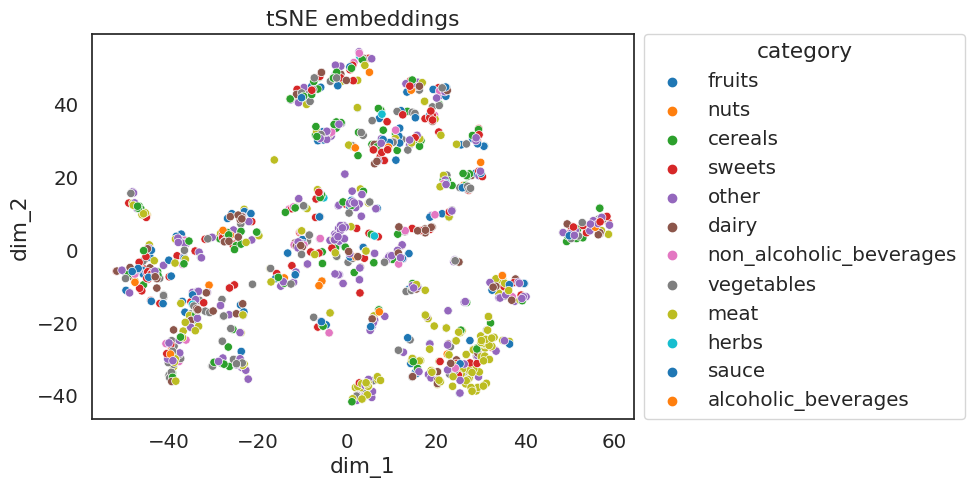

In [32]:
visualize_data(data_after_tsne, 'tSNE embeddings', hue_value='category')